<a href="https://colab.research.google.com/github/Mikhail-Klochkov/ml_intro/blob/master/Klochkov_HW_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (0 баллов) Считываем данные

In [ ]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
SEED = 42

# К сожалению, я начал сразу с получения лучшего результата, ниже далее есть пункты, которые идут по порядку)

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [ ]:
X = dataset['data']
X.shape

(506, 13)

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [ ]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
# Провезти некоторый анализ данных
List_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                      'DIS' ,'RAD' ,'TAX','PTRATIO' ,'B'  ,'LSTAT' ,'MEDV']
List_columns                    

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [ ]:
df_numpy = np.hstack([X, y[:, None]])
df_numpy.shape

(506, 14)

In [ ]:
df = pd.DataFrame(data = df_numpy, columns = List_columns)
df.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
def split_cols(cols_size = 4):
    list_cols = []
    cols_l = columns_list[1:]
    for i in range(len(cols_l)//cols_size + 1):
        list_cols.append(cols_l[i * cols_size: (i + 1) * cols_size] + columns_list[-1:])
    return list_cols



#### Ниже некоторое рассмотрение графиков, для лучшего понимания ситуцации.

In [ ]:
columns_list = list(df.columns)
split_cols = split_cols(4)
split_cols = split_cols[:-1]
split_cols

[['ZN', 'INDUS', 'CHAS', 'NOX', 'MEDV'],
 ['RM', 'AGE', 'DIS', 'RAD', 'MEDV'],
 ['TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]

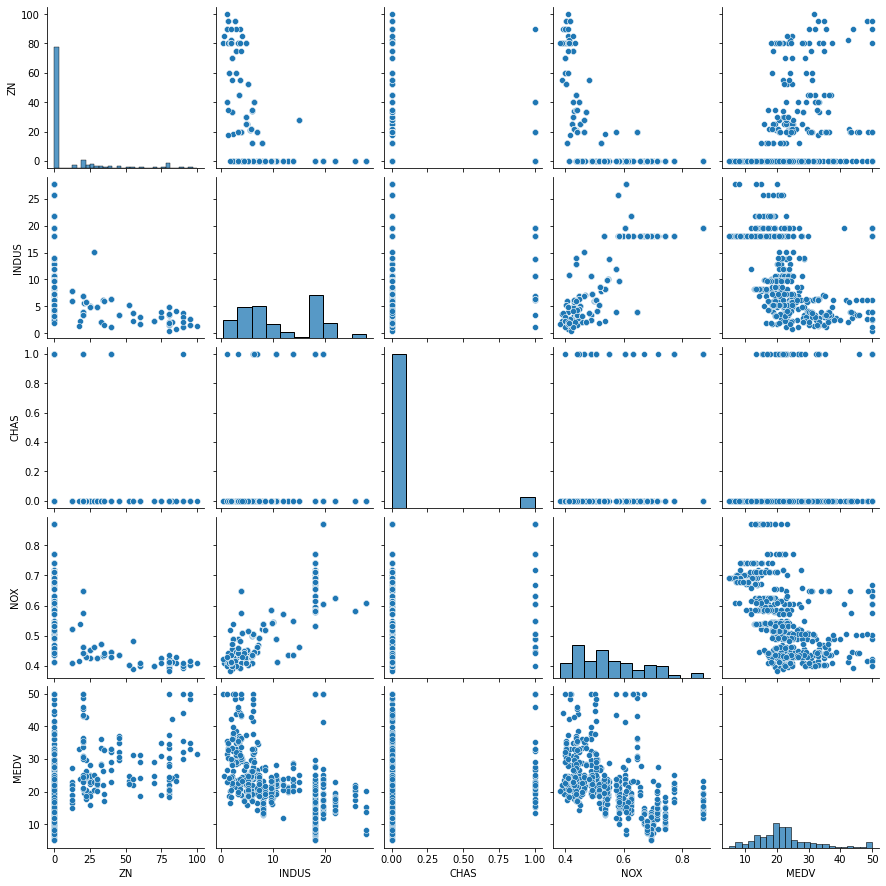

In [ ]:
# Построим плпарные графики для различных признаков в том числе, чтобы посмотреть, как они целевая переменная зависит от них
times = 0
sns.pairplot(df.drop(columns = set(columns_list).difference(set(split_cols[times]))))

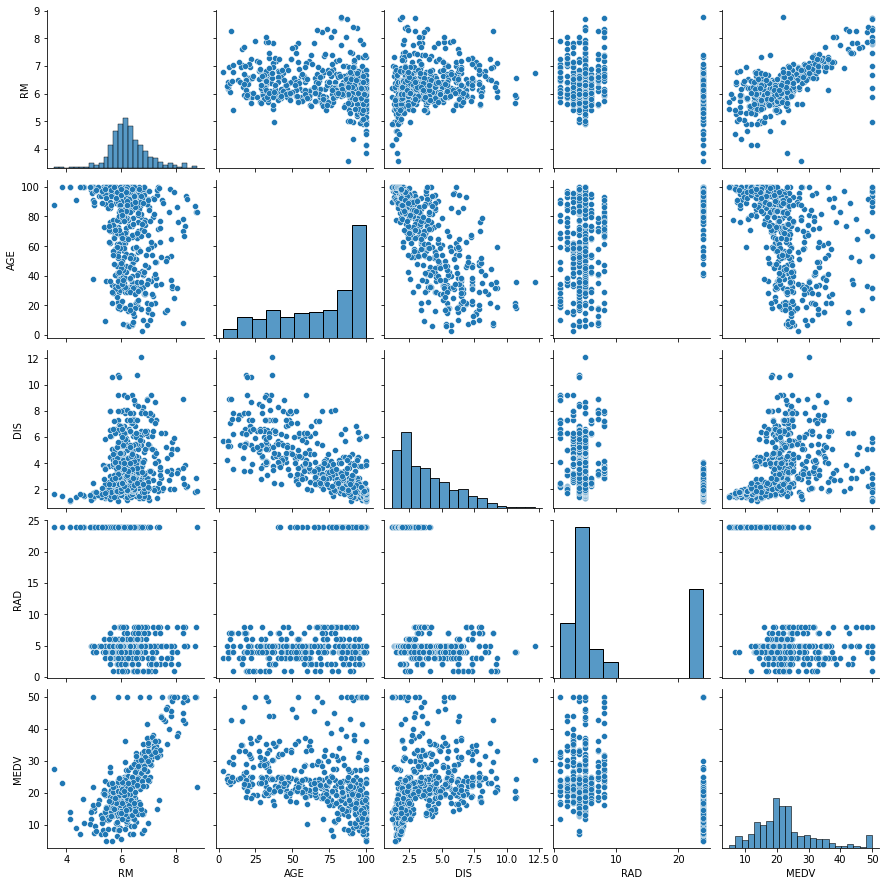

In [ ]:
times = 1
sns.pairplot(df.drop(columns = set(columns_list).difference(set(split_cols[times]))))

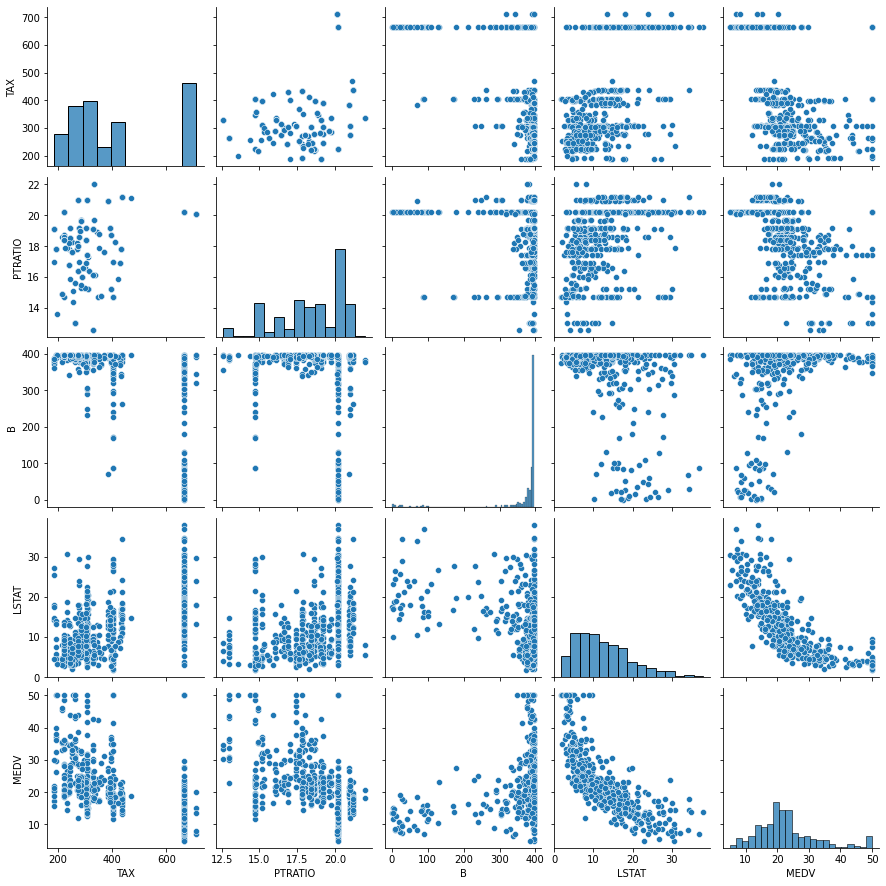

In [ ]:
times = 2
sns.pairplot(df.drop(columns = set(columns_list).difference(set(split_cols[times]))))

Много потенциально категориальных изначально признаков (PTRATIO, TAX, RAD, CHAS)

In [ ]:
potential_categorize_cols = ['PTRATIO', 'TAX', 'RAD', 'CHAS']
unique_vals = {}
for col in potential_categorize_cols:
  unique, counts = np.unique(df[col], return_counts = True)
  unique_vals[col] = [(u, c) for u, c in zip(unique, counts)]

print('Уникальные значения и их доля у признаков RAD: \n',unique_vals['RAD'], '\nCHAS: \n',  unique_vals['CHAS'])

Уникальные значения и их доля у признаков RAD: 
 [(1.0, 20), (2.0, 24), (3.0, 38), (4.0, 110), (5.0, 115), (6.0, 26), (7.0, 17), (8.0, 24), (24.0, 132)] 
CHAS: 
 [(0.0, 471), (1.0, 35)]


### Можно видеть, что данные признаки очень сдивнуты - не нормированны, возможно нужно использовать skew, для расчета величины смещения от нормального распределения (линейные модели очень сильно любят его)

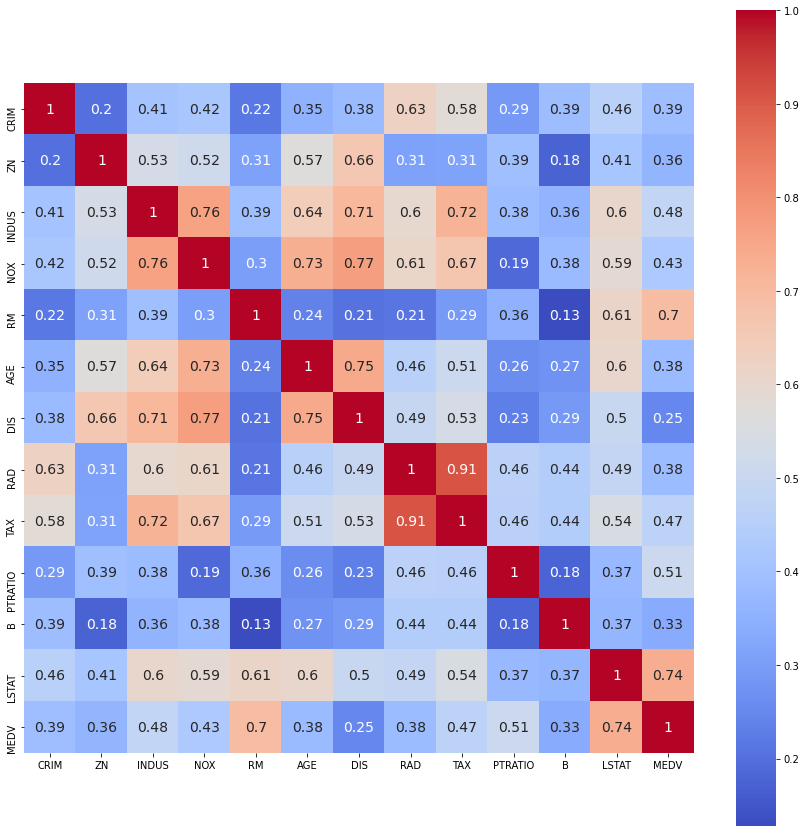

In [ ]:
# Посмотрим матрицу корреляций данных
# Построим другие зависимости
# Посмотрим на наиболее скоррелированные признаки с целевой переменной 
fig, axs = plt.subplots(figsize=(15, 15))
cross_matrix = df.drop(columns  = ['CHAS']).corr().abs()
sns.heatmap(cross_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})


In [ ]:
# CHAS column вообще почти нескоррелирован с какими-то данными!!!
# Сильно скоррелированные фичи с таргетом это PTRATIO, LSTAT, RM

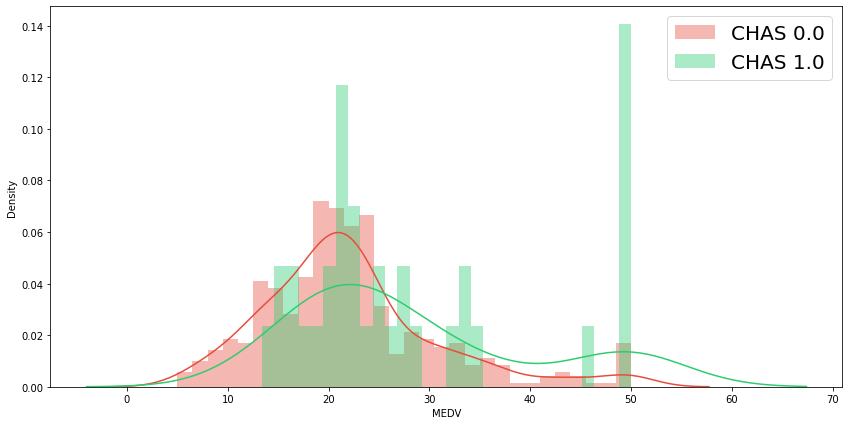

In [ ]:
# Как целевая переменная распределена относительно одного бинарного признака CHAS
CHAS_list = [0., 1.]
fig, ax = plt.subplots(figsize = (8, 7))
plt.subplots_adjust(right = 1.5)

for idx, chas_v in enumerate(CHAS_list):
  sns.distplot(df[df.CHAS == chas_v].MEDV, label = 'CHAS ' + str(chas_v),
                    hist = True, color = '#e74c3c' if chas_v == 0. else '#2ecc71',
                    ax = ax, bins = 30)
  
  ax.legend(loc = 'upper right', prop = {'size': 20})



### Кажеться, что достаточно много выбросов в данных, например наличие реки по границе, как-то странно выбивает цену вправо (см. график)


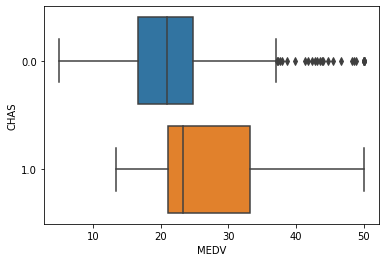

In [ ]:
sns.boxplot(y = 'CHAS', x = 'MEDV', data = df, orient = 'h') # Видно как много выбросов (смещение) возможно необходимо будет box-cox

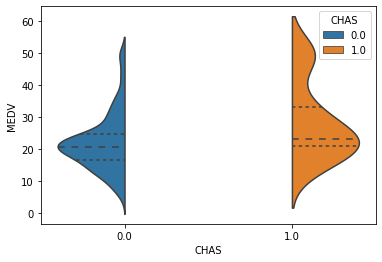

In [ ]:
sns.violinplot(y = 'MEDV', x = 'CHAS', hue = 'CHAS', data = df, split = True, inner = 'quart')

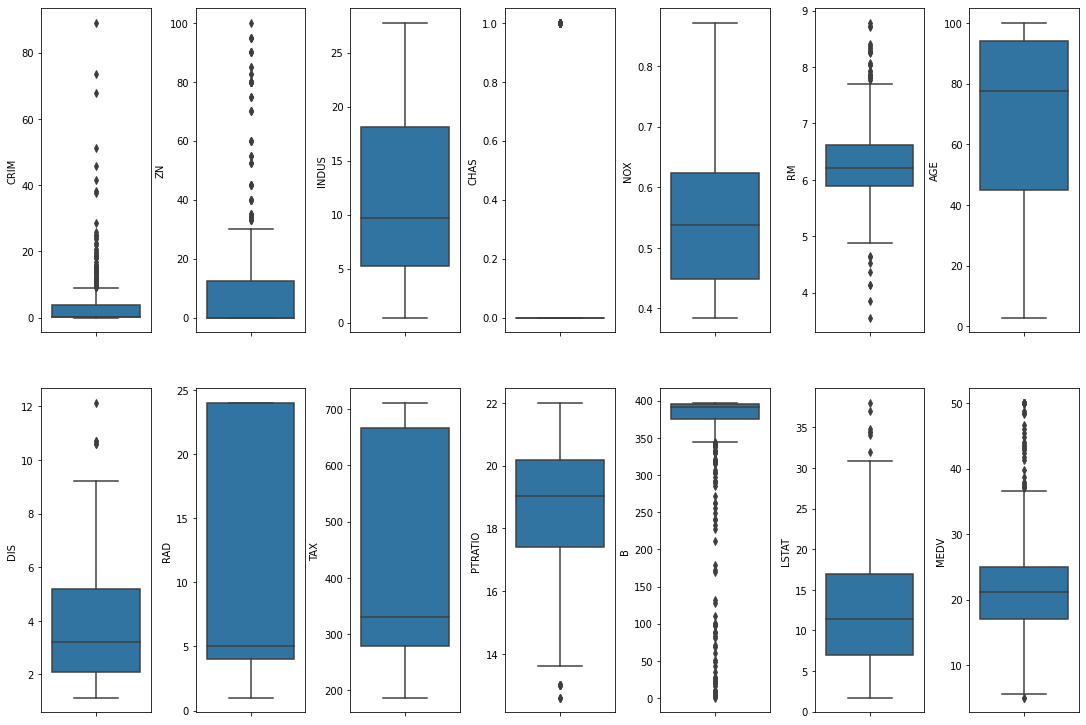

In [ ]:
# Дополнительное исследование 
fig, axs = plt.subplots(2, 7, figsize = (15, 10))
axs = axs.flatten()
index = 0
for k, v in df.items():
  sns.boxplot(y = k, data = df, ax = axs[index])
  index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [ ]:
# Посмотрим на процентное содержание выбросов в каждой из колонок данных
outliers_nums = {}
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75) 
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  outliers_nums[k] = v_col.shape[0] * 100. / v.shape[0]

sorted(outliers_nums.items(), key = lambda d: d[1])
outliers_ser = pd.Series(outliers_nums)
outliers_ser.sort_values(ascending = False)

CHAS       100.000000
B           15.217391
ZN          13.438735
CRIM        13.043478
MEDV         7.905138
RM           5.928854
PTRATIO      2.964427
LSTAT        1.383399
DIS          0.988142
TAX          0.000000
RAD          0.000000
AGE          0.000000
NOX          0.000000
INDUS        0.000000
dtype: float64

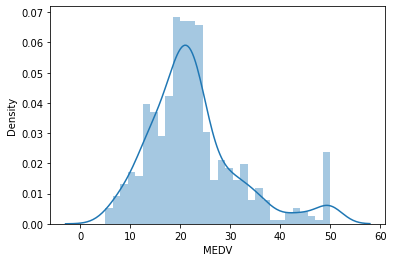

In [ ]:
# Построим наше исходное распределение целевой метки
sns.distplot(a = df.MEDV, bins = 30)

In [ ]:
df_copy = df.copy(deep = True)

#### Есть сильное соображение, что прозошёл обрез данных на 50 ка, что сильно видно на графике, это потенциально искажает первичное распределение данных, то есть вероятностную природу. Поэтому целесообразно избавиться от этого аномального столбика на гистограмме выше.

In [ ]:
df_copy = df_copy[~(df_copy.MEDV >= 50)]
df_copy.shape

(490, 14)

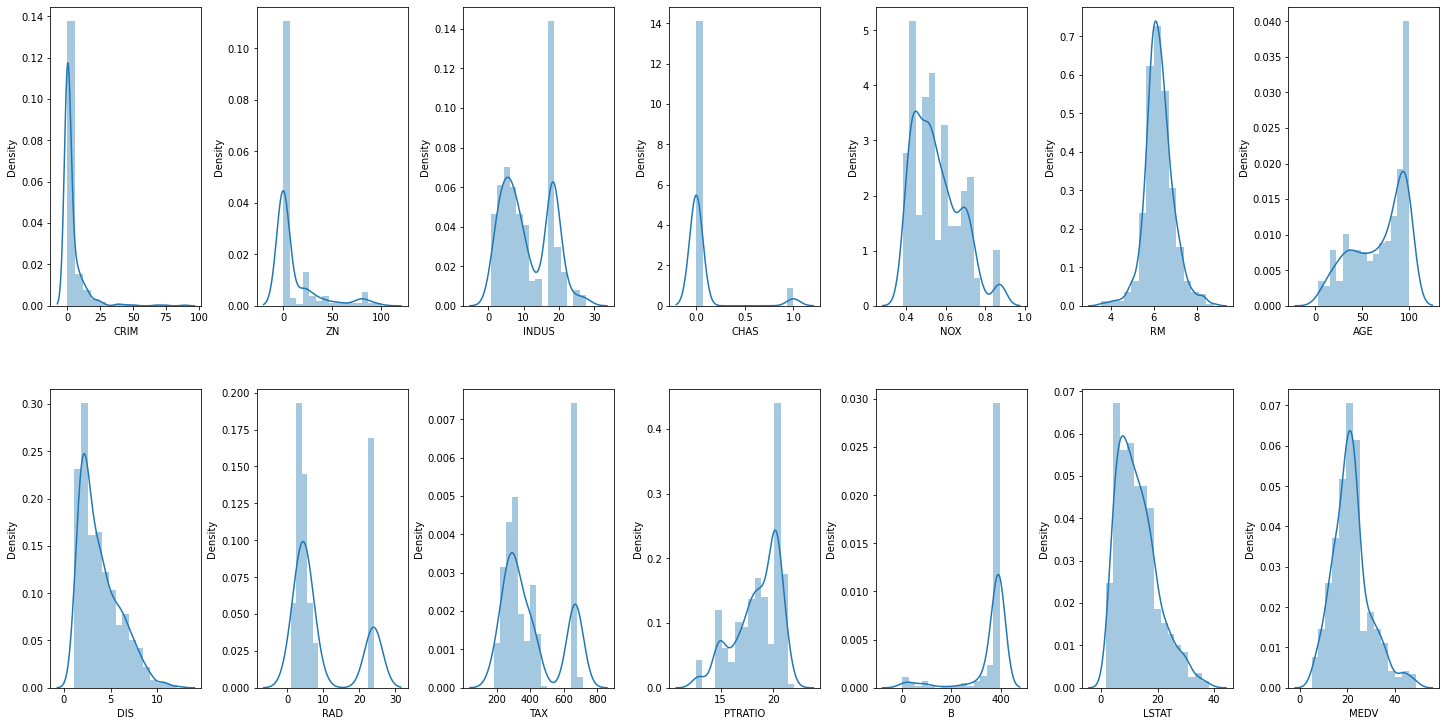

In [ ]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize =  (20, 10))
index = 0
axs = axs.flatten()
for k, v in df_copy.items():
  sns.distplot(a = v, bins = 15, ax = axs[index])
  index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.)

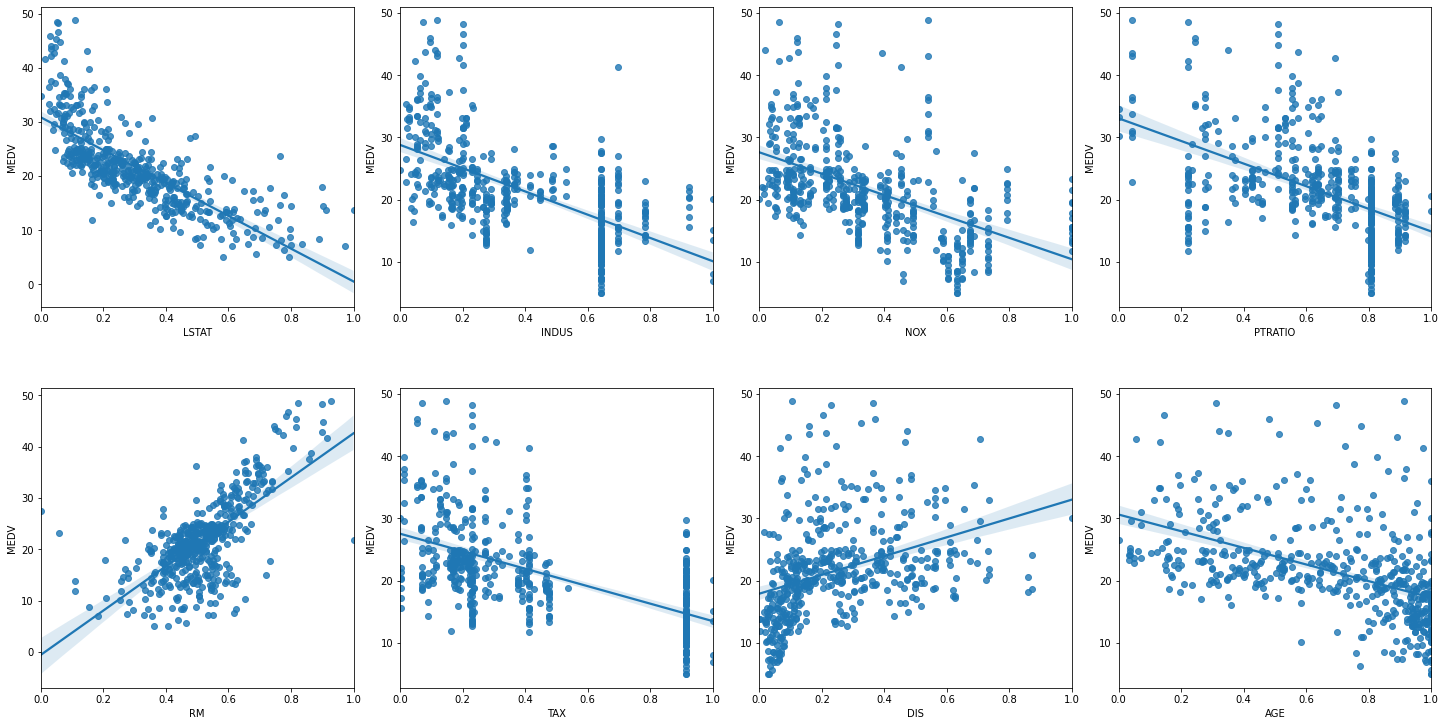

In [ ]:
# Здесь рассмотрим ряд признаков и попробуем постмотреть, как будет строиться лиейная зависимость LR от признака целевого и относительно других фичей
from sklearn import preprocessing

fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize =  (20, 10))
index = 0
axs = axs.flatten()
min_max_scaler = preprocessing.MinMaxScaler()
columns_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df_copy.loc[:, columns_sels]
y = df_copy['MEDV']

x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = columns_sels) 
for idx, k in enumerate(x.keys()):
  sns.regplot(y = y, x = x[k], ax = axs[index])
  index += 1


  
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.)


#### Так как само MEDV имеет SKEW и отличается от нормального, мы можем его преобразовать np.log(x + 1). И потом обратное построить преобразования, для оценки раьоты алгоритма на cross_val_score

In [ ]:
y_log = np.log1p(y) #  np.exp1
for col in x.columns:
  if np.abs(x[col].skew() > 0.3):
    x[col] = np.log1p(x[col])

# после этого можно попробовать обучить модель!

In [ ]:
# Написал свою версию, та как необходимо выключить scaler_min_max, StandartScaler

def cross_val_score_my(model, X, y, cv = 10, dict_params = {}):
  kf = KFold(n_splits = cv, shuffle = True)
  scores = []
  scaler_min_max = preprocessing.MinMaxScaler()
  scaler_norm = preprocessing.StandardScaler()
  x_scaled = scaler_norm.fit_transform(x.to_numpy())

  for idx_tr, idx_ts in kf.split(X, y):
    idx_tr_l, idx_ts_l = idx_tr.tolist(), idx_ts.tolist() 
    y_log_n = y.to_numpy()
    X_train, X_test, y_train, y_test = x_scaled[idx_tr_l], x_scaled[idx_ts_l], y_log_n[idx_tr_l], y_log_n[idx_ts_l]
    m = model()
    m.set_params(**dict_params)
    m.fit(X_train, y_train)
    y_pred = np.expm1(m.predict(X_test)) #  in normal range
    scores.append(mean_squared_error(y_pred, np.expm1(y_test)))


  print('mean_square_error: {:.2f} +- {:.2f}'.format(np.array(scores).mean(), np.array(scores).std()))
  return np.array(scores)



In [ ]:
# Просто тоже самое, только для конкретного LR 
kf = KFold(n_splits = 10, shuffle = True)
scores = []

scaler_min_max = preprocessing.MinMaxScaler()
scaler_norm = preprocessing.StandardScaler()

for idx_tr, idx_ts in kf.split(x, y_log):
  x_scaled = scaler_min_max.fit_transform(x.to_numpy())
  idx_tr_l, idx_ts_l = idx_tr.tolist(), idx_ts.tolist() 
  y_log_n = y_log.to_numpy()
  X_train, X_test, y_train, y_test = x_scaled[idx_tr_l], x_scaled[idx_ts_l], y_log_n[idx_tr_l], y_log_n[idx_ts_l]
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = np.expm1(lr.predict(X_test)) #  in normal range
  scores.append(mean_squared_error(y_pred, np.expm1(y_test)))


print('mean_square_error: {:.2f} +- {:.2f}'.format(np.array(scores).mean(), np.array(scores).std()))

mean_square_error: 13.04 +- 3.47


In [ ]:
# Моя версия тоже самое
cross_val_score_my(LinearRegression, x, y_log, cv = 10);

mean_square_error: 13.52 +- 1.86


In [ ]:
# GridSearch Ridge для поска параемтра регуляризации
X_train, X_test, y_train, y_test = train_test_split(x, y_log, test_size = 0.1, random_state = 42)

X_train = scaler_min_max.fit_transform(X_train)
param_alpha = [
  {'alpha' : np.logspace(-4, 3, 14)}
]
model_r = Ridge()
kf = KFold(n_splits = 10, shuffle = True)
grid_r = GridSearchCV(model_r, param_grid = param_alpha, scoring = 'neg_mean_squared_error', cv = kf)
grid_r.fit(x, y_log)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 3.45510729e-04, 1.19377664e-03, 4.12462638e-03,
       1.42510267e-02, 4.92388263e-02, 1.70125428e-01, 5.87801607e-01,
       2.03091762e+00, 7.01703829e+00, 2.42446202e+01, 8.37677640e+01,
       2.89426612e+02, 1.00000000e+03])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
best_r = grid_r.best_estimator_
best_r.get_params()

{'alpha': 0.17012542798525893,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

### Вот тут получилось качество на cross-val-score лучшее, что было. Можно также применрить stacking например того же LR с Ridge с подбором весовых параметров, как это было сделано мною в первой части домашнего задания на diabets.

In [ ]:
cross_val_score_my(Ridge, x, y_log, cv = 10, dict_params = best_r.get_params());

mean_square_error: 13.30 +- 4.01


### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.


In [ ]:
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:

model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### (2 балл) Валидация результата

Напишите свою функцию MSE и посчитайте своей результат на тестовой части.

In [ ]:
def MSE(y_real, y_pred):
    return ((y_real - y_pred) ** 2).sum()/y_real.shape[0]

In [ ]:
MSE(y_test, model_baseline.predict(X_test))

14.99585287658254

### То, что нам дала LR без какой-либо предобработки данных

In [ ]:
n_scores = cross_val_score(model_baseline, X, y, cv = 10, scoring = 'neg_mean_squared_error')
n_scores.mean(), n_scores.std()

(-34.70525594452491, 45.57399920030867)

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator, RegressorMixin, ClassifierMixin
class NaiveMean(RegressorMixin, TransformerMixin, BaseEstimator):

  def __init__(self):
    super().__init__()
    return None

  def fit(self, X_train, y_train):
    self._ytrain_mean = y_train.mean()

  def predict(self, X):
    return np.full((X.shape[0], ), self._ytrain_mean)

nv = NaiveMean()
nv

NaiveMean()

In [ ]:
y_pred_naive = [y_train.mean()] * y_test.shape[0]

In [ ]:
MSE(y_test, y_pred_naive)

65.00802631111615

### Ниже то, что дал наивный алгоритм.

In [ ]:
n_scores = cross_val_score(nv, X, y, cv = 10, scoring = 'neg_mean_squared_error')
-n_scores.mean(), n_scores.std()

(92.10173239421954, 66.38436430007486)